# Homework 2: Data manipulation and retrieval

In this homework you will work with weather data available through NOAA. You will write functions to manipulate and plot data from a .csv file, as well as write code to pull data from an online database using an API. 

## Loading .csv data (10 points)

The .csv format is one of the most common due to its simplicity and portability. Included with this homework is the dataset `ATL_weather.csv` which contains the temperature and some cloud cover and wind speed data from 1930-2018. Write a Python function that loads this file and returns a Numpy array with columns corresponding to:

0: year

1: month

2: day

3: total cloudiness (ACMH)

4: daytime cloudiness (ACSH)

5: windspeed (AWND)

6: average temperature (TAVG)

7: max temperature (TMAX)

8: min temperature (TMIN)

Use `numpy.nan` as a placeholder for missing values. If `TAVG` is not available then assume it is equal to the average of the minimum and maximum temperature. Note that the `genfromtxt` function will work, but may need some additional keyword arguments, so check the documentation.

Use your function to load the dataset and print its shape.

In [143]:
%matplotlib inline
import numpy as np
from numpy import array
import csv
from scipy import stats
import math

def load_data(file):
    data = np.genfromtxt(file +'.csv',skip_header=1,delimiter=',')[:,3:]
    mask = np.isnan(data[:,6])
    data[:,6][mask] = (data[:,7][mask] + data[:,8][mask])/2
    #print(data.shape)  
    return data

load_data("ATL_weather")
#print(data)
print(data.shape)
    




(32152, 9)


## Working with numpy arrays (30 points)

Write a function that takes three arguments:

1: data array returned from previous function

2: average time period (can be `daily`, `monthly`, `annually`)

3: output value (can be `total_clouds`, `daytime_clouds`, `wind`, `avg_temp`, `max_temp`, `min_temp`)

The function should return two vectors: `date`, `avg_quantity` where `date` is a vector of dates in [numpy format](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.datetime.html), and `avg_quantity` is the average of the requested quantity over the requested period.

Note that the function does not take a start/end date, but should return all dates for which data is available. In the event that there is partial information (e.g. data for half of a year) the function should return the average of the data that is available.

Use your function to compute the `date` and `avg_quantity` vectors for minimum monthly temperature. Print the date of the coldest month since 1930 in Atlanta.

Hint: You may want to read about [using boolean masks](https://www.python-course.eu/numpy_masking.php) to select data from numpy arrays.

In [196]:
from numpy import array
from itertools import *
from datetime import datetime
from numpy import nan
data = load_data("ATL_weather")



def time_avg(data,time_period,output_value):  
    date = []
    avg_quantity = []    
    column = {"total_clouds":3,"daytime_clouds":4,"wind":5,"avg_temp":6,"max_temp":7,"min_temp":8}
    
    if time_period == 'annually':
        for year in range(1930,2019):
            mask_y = data[:,0] == year
            mask_nan = ~np.isnan(data[:,column[output_value]])  
            mask = mask_y&mask_nan
            if any(mask):
                average = np.mean(data[:,column[output_value]][mask])
                a = np.datetime64('{:%Y}'.format(datetime(year,1,1)))
                date.append(a)
                avg_quantity.append(average)

    
    elif time_period == 'monthly':
        for year in range(1930,2019):
            mask_y = data[:,0] == year
            for month in range(1,13):
                mask_m = data[:,1] == month
                mask_nan = ~np.isnan(data[:,column[output_value]])         
                mask = mask_y&mask_m&mask_nan
                if any(mask):
                    average = np.mean(data[:,column[output_value]][mask])
                    a = np.datetime64('{:%Y-%m}'.format(datetime(year,month,1)))
                    date.append(a)
                    avg_quantity.append(average)
   
    elif time_period == 'daily':
        for index, iterms in enumerate((data[:,0:3].astype(int))):
            mask_nan = ~np.isnan(data[:,column[output_value]])         
            if any(mask_nan):
                a = np.datetime64('{:%Y-%m-%d}'.format(datetime(*iterms)))
                date.append(a)
                avg_quantity = data[:,column[output_value]][mask_nan]
    
    else:
        pass
    
    return date, avg_quantity

#"""
date, avg_quantity = time_avg(data,'monthly','min_temp')
index = avg_quantity.index(min(avg_quantity))
date_min_temp = date[index]
print(date_min_temp)
print(min(avg_quantity))
#"""

"""
date, avg_quantity = time_avg(data,'daily','avg_temp')
print(date[19722])
print(avg_quantity[19722:32151].size)
"""

1977-01
20.0322580645


"\ndate, avg_quantity = time_avg(data,'daily','avg_temp')\nprint(date[19722])\nprint(avg_quantity[19722:32151].size)\n"

## Plotting data (10 points) - Graduate only

Modify the function from the previous problem to include an additional keyword argument of `plot` which is `False` by default. If `plot` is true, the function should plot the output and return the figure object in addition to the `date` and `avg_quantity` vectors. Note that you can call your function from the last block, so you don't necessarily need to re-write it.

Use your function to plot the annual average windspeed in Atlanta since 1984.

([numpy.datetime64('1984'),
  numpy.datetime64('1985'),
  numpy.datetime64('1986'),
  numpy.datetime64('1987'),
  numpy.datetime64('1988'),
  numpy.datetime64('1989'),
  numpy.datetime64('1990'),
  numpy.datetime64('1991'),
  numpy.datetime64('1992'),
  numpy.datetime64('1993'),
  numpy.datetime64('1994'),
  numpy.datetime64('1995'),
  numpy.datetime64('1996'),
  numpy.datetime64('1997'),
  numpy.datetime64('1998'),
  numpy.datetime64('1999'),
  numpy.datetime64('2000'),
  numpy.datetime64('2001'),
  numpy.datetime64('2002'),
  numpy.datetime64('2003'),
  numpy.datetime64('2004'),
  numpy.datetime64('2005'),
  numpy.datetime64('2006'),
  numpy.datetime64('2007'),
  numpy.datetime64('2008'),
  numpy.datetime64('2009'),
  numpy.datetime64('2010'),
  numpy.datetime64('2011'),
  numpy.datetime64('2012'),
  numpy.datetime64('2013'),
  numpy.datetime64('2014'),
  numpy.datetime64('2015'),
  numpy.datetime64('2016'),
  numpy.datetime64('2017'),
  numpy.datetime64('2018')],
 [8.781612021857924

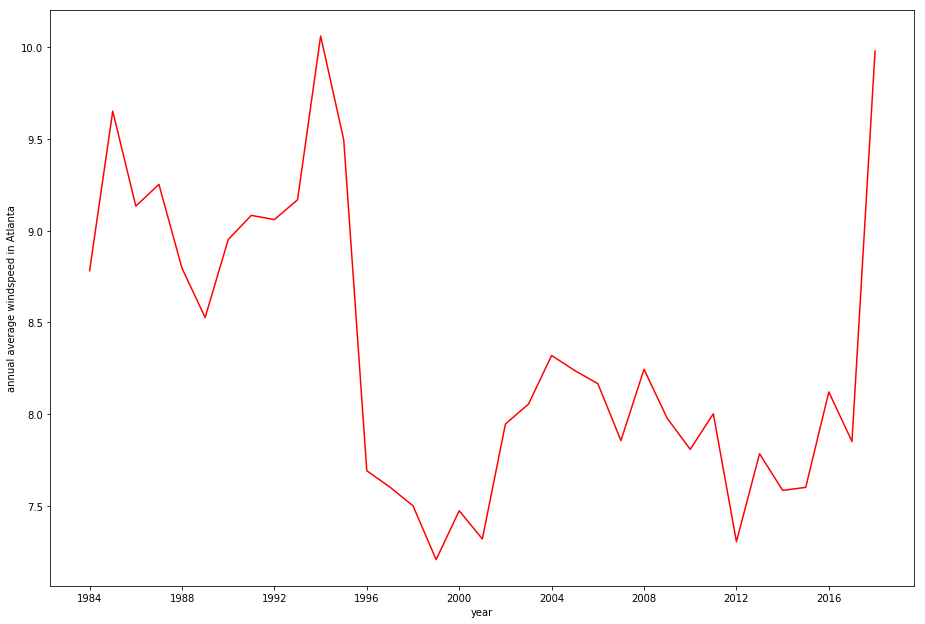

In [147]:
import pandas
import matplotlib.pyplot as plt
#date= []
#avg_quantity = []

def time_avg_plot(data,time_period,output_value,plot=False):
    
    if plot == True:
        date, avg_quantity = time_avg(data,'annually','wind')
       # print(date)
       # print(avg_quantity)
        fig = plt.figure()
        axes = fig.add_axes([0.2, 0.2, 2, 2]) # left, bottom, width, height (range 0 to 1)
        axes.plot(date,avg_quantity,'r')
        axes.set_xlabel('year')
        axes.set_ylabel('annual average windspeed in Atlanta')
        return date, avg_quantity, fig
    
    return date, avg_quantity

time_avg_plot(data,'annually','wind',True)

## Plotting 2 datasets (5 points)

Plot the average daily windspeed vs. the average daily temperature since 1984 on a single plot.

Text(0,0.5,'The average daily windspeed')

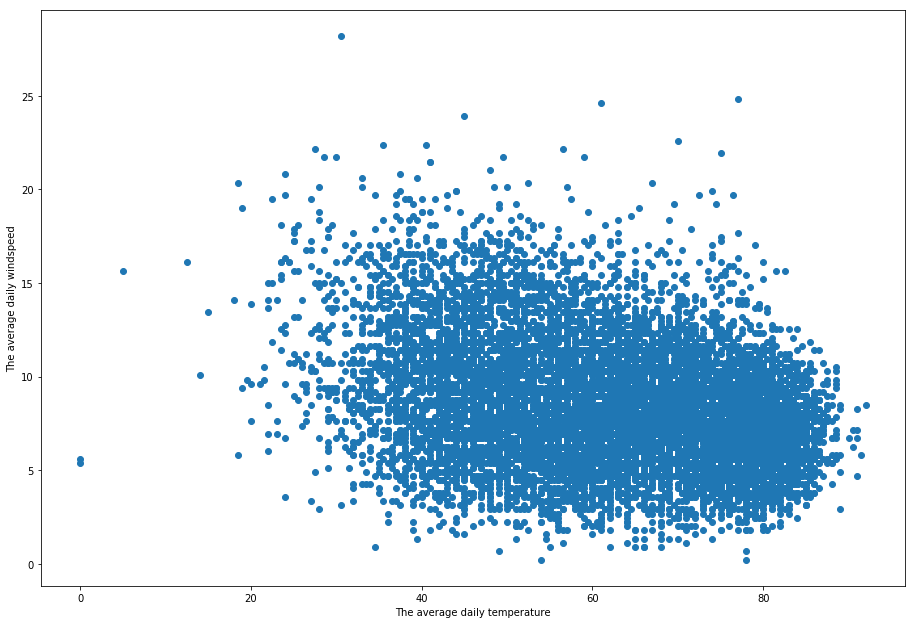

In [208]:
import pandas
import matplotlib.pyplot as plt
date= []
avg_quantity_wind = []
date, avg_quantity_wind = time_avg(data,'daily','wind')

date_temp= []
avg_quantity_temp = []
date_temp, avg_quantity_temp = time_avg(data,'daily','avg_temp')


fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 2, 2]) # left, bottom, width, height (range 0 to 1)
axes.plot(avg_quantity_temp[19722:32151],avg_quantity_wind,'o')
axes.set_xlabel('The average daily temperature')
axes.set_ylabel('The average daily windspeed')

## Using pandas dataframes (15 points)

Another powerful option for working with spreadsheet-like data is the `pandas` module. Use `pandas` to initialize a "dataframe" from the .csv file. Once the dataframe is initialized, use a single line of code to access the maximum (TMAX) and average (TAVG) temperatures for 1/1/2017 - 1/7/2017.

You may find this [introductory tutorial](https://pandas.pydata.org/pandas-docs/stable/10min.html) helpful. 

In [96]:
import pandas as pd
import numpy as np
df = pd.read_csv('ATL_weather.csv')
df.loc[31776:31782,['YEAR','MONTH','DAY','TMAX','TAVG']]


,YEAR,MONTH,DAY,TMAX,TAVG
31776,2017,1,1,51.0,47.0
31777,2017,1,2,59.0,52.0
31778,2017,1,3,65.0,59.0
31779,2017,1,4,55.0,52.0
31780,2017,1,5,57.0,42.0
31781,2017,1,6,46.0,40.0
31782,2017,1,7,31.0,28.0


## Accessing data with an API (30 points)

Often you will want to access data that is not available in an organized format, but only through online databases. The most common interface to these databases is called a "RESTful" interface, which basically means you can query data by putting in a structured URL. The NOAA data that we are using is available through a RESTful database, as documented here:

https://www.ncdc.noaa.gov/cdo-web/webservices/v2

For this problem you will need to sign up for an API token as explained in this website (it takes about 30 seconds and is only there to keep bots from accessing data), and you can then use the Python `requests` module to pull NOAA data directly into Python. The example below pulls the maximum temperature for all days in 2017 in Atlanta. However, the input format for the RESTful URL and the output format are not intuitive. Write a function that takes the following arguments:

1: start date

2: end date

3: data type (`total_clouds`, `daytime_clouds`, `wind`, `avg_temp`, `max_temp`, `min_temp`)

(note that you will need to use the official variable names for these as given in the first problem (e.g. ACMH))

and returns a `date` vector and `quantity` vector.

**UNDERGRADS:**
Use your function to plot the average daily temperature from 1/1/2014 - 1/1/2015.

**GRAD STUDENTS ONLY:**
the API only allows you to pull one year of data at a time. Construct a for loop with your function to pull and plot 1/1/2014 - 1/1/2016

Text(0,0.5,'average daily temperature')

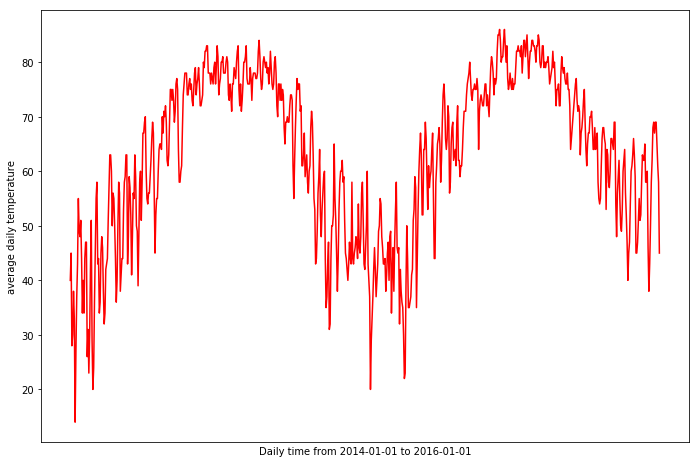

In [205]:
import requests
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

def get_datatype(startdate,enddate,datatype):
    date = []
    quantity = []
    token = "tjOJUhcIdEDTbzIlndAxfNGMxoESVLFv"
    url = "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?limit=1000&units=standard&datasetid=GHCND&stationid=GHCND:USW00013874&datatypeid={2}&startdate={0}&enddate={1}".format(startdate,enddate,datatype)
    #Note: you do not need to edit the limit, units, datasetid, or stationid fields.
    headers = {'token': token}
    response = requests.get(url, headers = headers)
    r_json = response.json() #the json object acts like a dictionary
    if bool(r_json):        
        result_list = r_json['results']
        for i in range(len(result_list)):
            date.append(result_list[i]['date'])
            quantity.append(result_list[i]['value'])
    else:
        print('No data type is available')

    return date,quantity

#date,quantity = get_datatype('2017-01-01','2018-01-01','TMAX')
#print(len(date))

time = ['2014-01-01','2015-01-01','2016-01-01']
x =[]
y = []

for i in range(2):
    date,quantity= get_datatype(time[i],time[i+1],'TAVG')
    x += date
    y += quantity

fig = plt.figure()
axes = fig.add_axes([0.2, 0.2, 1.5, 1.5]) # left, bottom, width, height (range 0 to 1)
axes.plot(x,y,'r')
plt.xticks([])
axes.set_xlabel('Daily time from 2014-01-01 to 2016-01-01')
axes.set_ylabel('average daily temperature')


